## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
unique_users = df['user_id'].nunique()
unique_users

290584

d. The proportion of users converted.

In [5]:
converted_portion = df.query('converted == 1')['user_id'].nunique()/unique_users
converted_portion * 100

12.104245244060237

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
no_new_page_treatment = df.query("landing_page != 'new_page' and group == 'treatment'")
no_treatment_new_page = df.query("landing_page == 'new_page' and group != 'treatment'")
no_new_page_treatment.count()[0] , no_treatment_new_page.count()[0]

(1965, 1928)

f. Do any of the rows have missing values?

In [7]:
df.info() #no nulls confirmed 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df.drop(no_new_page_treatment.index, inplace = True)
df.drop(no_treatment_new_page.index, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [9]:
df.to_csv('modified.csv', index= False)
df2 = pd.read_csv('modified.csv')
df2.info()   #same as df after modification

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290585 entries, 0 to 290584
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.1+ MB


In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
duplicate_id = df2['user_id'].value_counts().index[0]
duplicate_id

773192

c. What is the row information for the repeat **user_id**? 

In [13]:
duplicate = df2[df2["user_id"] == duplicate_id] 
duplicate   #duplicate found

,user_id,timestamp,group,landing_page,converted
1876,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2862,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
df2.drop(duplicate.index[0], inplace = True)

In [15]:
df2.info()  #after droping the duplicate 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 290584
Data columns (total 5 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [16]:
conversion = df.query('converted == 1').count()/ df.shape[0]
conversion[0]

0.11959667567149027

b. Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
control_propability =df.query("group == 'control' and converted == 1").count()[0]/df.query("group == 'control'").count()
control_propability[0]

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
treatment_propability =df.query("group == 'treatment' and converted == 1").count()[0]/df.query("group == 'treatment'").count()
treatment_propability[0]

0.11880724790277405

d. What is the probability that an individual received the new page?

In [19]:
new_page_probability = df2.query("landing_page == 'new_page'").count()[0]/df.shape[0]
new_page_probability

0.50006022334256761

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

In [20]:
observed = treatment_propability - control_propability    #this is an observed diff.
observed

user_id        -0.001579
timestamp      -0.001579
group          -0.001579
landing_page   -0.001579
converted      -0.001579
dtype: float64

The difference in propability between both groups is so small and doesnt give enough data about conversion.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$** , which are the converted rates for the old and new pages.

**$H_{0}$** : **$p_{old}$** >= **$p_{new}$**  >>>>  **$p_{old}$** -  **$p_{new}$** >= 0

**$H_{1}$** : **$p_{new}$** < **$p_{old}$** >>>> **$p_{new}$** - **$p_{old}$** < 0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

The **$H_{1}$** = **$H_{0}$** before we start sample distribution
so we will use the same conversion rate from Part I

In [21]:
conversion[0]

0.11959667567149027

b. What is the **conversion rate** for $p_{old}$  under the null? <br><br>

The **$H_{0}$** is true before we collect any data
so we will use the same conversion rate from Part I

In [22]:
conversion[0]

0.11959667567149027

c. What is $n_{new}$, the number of individuals in the treatment group?

In [23]:
n_new = df2.query("landing_page == 'new_page'").count()[0]
n_new

145310

d. What is **$n_{old}$** , the number of individuals in the control group?

In [24]:
n_old = df2.query("landing_page == 'old_page'").count()[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [25]:
new_page_converted = np.random.choice([0,1] ,n_new, conversion[0])
new_page_converted

array([0, 0, 1, ..., 0, 1, 1])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [26]:
old_page_converted = np.random.choice([0,1], n_old, conversion[0])
old_page_converted

array([0, 0, 0, ..., 1, 0, 1])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [27]:
p_new = new_page_converted.mean()
p_old = old_page_converted.mean()
observed_diff = p_new - p_old
observed_diff

-0.0019962039425722167

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [ ]:
# i forgot about numby bionomial and used python builtin loop which took a long.
"""
p_diffs = []
for i in range(10000):
    sample = df2.sample(df2.shape[0], replace = True)
    new = np.random.choice([1,0], n_new, p_new)
    old = np.random.choice([1,0], n_old, p_old)
    p_diffs.append(new.mean() - old.mean()) 

"""

In [29]:
p_new = conversion[0]             #the actuall convertion rate for both 
p_old = conversion[0]
new_simulation = np.random.binomial(n_new, p_new, 10000)/n_new
old_simulation = np.random.binomial(n_old, p_old, 10000)/n_old
p_diffs = new_simulation - old_simulation
p_diffs

array([-0.00131679, -0.00049783,  0.00194571, ..., -0.00010538,
        0.00193173, -0.00125498])

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

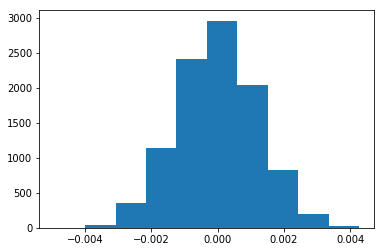

In [30]:
import copy
new = copy.deepcopy(p_diffs)
plt.hist(new);


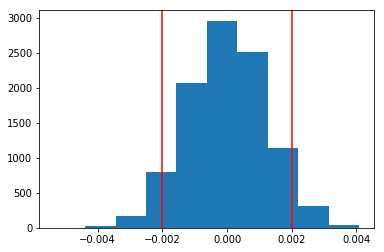

In [31]:
null = np.random.normal(0, np.std(p_diffs),10000)

plt.hist(null);
plt.axvline(observed_diff, color = 'red');
plt.axvline(-observed_diff,color = 'red');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [32]:
(p_diffs > observed[0]).mean()   #this is p_value >>> 0.05 fail to reject null

0.90159999999999996

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

This is the p_value of this hypothesis **p_diffs = 0.9015**,

0.01 - 0.05 **Type I error** accepted range ,

for bussinesses its mostly 0.05

p_value > 0.05 which means **we fail to reject null**


l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [70]:
#getting the conversion for both groups and the count. 
import statsmodels.api as sm

convert_old = df.query("group == 'control' and converted == 1").count()[0]
convert_new = df.query("group == 'treatment' and converted == 1 ").count()[0]
n_old = df2.query("landing_page == 'old_page'").count()[0]
n_new = df2.query("landing_page == 'new_page'").count()[0]
convert_old, convert_new, n_old, n_new

(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [34]:
# link is not working, checking the classroom again and online
#https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html

In [35]:
sm.stats.proportions_ztest([convert_old,convert_new], [n_old,n_new], alternative='smaller')

(1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

p_value from the stats model = 0.09 still larger than the accepted type I error,
also fail to reject none.

z_score = 1.3

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

logestic regression, since its not quantitative, linear wont be hulpful 

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [36]:
df2['intercept'] = 1

In [37]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1


In [38]:
df2[['control_dum', 'ab_page']] = pd.get_dummies(df2['group'])
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,control_dum,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


In [39]:
df2 = df2.drop('control_dum', axis = 1)
df2.head()


,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [40]:
my_model = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
fitting = my_model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [41]:
fitting.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-06-14 12:28 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

both cases **pvalue > 0.05** which is higher than the accepted **Type I error**
statistically, date is not enough.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

fear of change, usually older users are biased to old versions. this model dont show number of old and new users.
disadvantages comes from the data itself by using incomplete data and get erroneous conclusions. 

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [42]:
countries = pd.read_csv("countries.csv")
countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [43]:
merge_df = countries.merge(df2)
merge_df.head()

,user_id,country,timestamp,group,landing_page,converted,intercept,ab_page
0,834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
1,928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
2,822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
3,711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
4,710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [44]:
merge_df.nunique()

user_id         290584
country              3
timestamp       290584
group                2
landing_page         2
converted            2
intercept            1
ab_page              2
dtype: int64

In [45]:
merge_df['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [46]:
merge_df[['UK','US','CA']] = pd.get_dummies(merge_df['country'])

In [47]:
#UK_ab_page not needed bc its the baseline can be dropped but i will keep it
merge_df['UK_ab_page'] = merge_df['UK'] * merge_df['ab_page']   
merge_df['US_ab_page'] = merge_df['US'] * merge_df['ab_page']
merge_df['CA_ab_page'] = merge_df['CA'] * merge_df['ab_page']

In [48]:
merge_df.head()

,user_id,country,timestamp,group,landing_page,converted,intercept,ab_page,UK,US,CA,UK_ab_page,US_ab_page,CA_ab_page
0,834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0,0,0,0
1,928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,0,0,1
2,822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,0,1,0
3,711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0,0,0,0
4,710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,0,1,0


In [49]:
country_model = sm.Logit(merge_df['converted'],\
                         merge_df[['intercept', 'ab_page', 'US', 'CA']])

In [50]:
country_fit = country_model.fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [51]:
country_fit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-06-14 12:28 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0300    0.0266  -76.2488  0.0000  -2.0822  -1.9778
ab_page       -0.0149    0.0114   -1.3069  0.1912  -0.0374   0.0075
US             0.0506    0.0284    1.7835  0.0745  -0.0050   0.1063
CA             0.0408    0.0269    1.5161  0.1295  -0.0119   0.0934
==================================================================

"""

In [52]:
coef = country_fit.params

In [53]:
intercept_co = 1/np.exp(coef[0])   #this is a negative value.
intercept_co

7.6143034589306628

In [54]:
page_co = 1/np.exp(coef[1])   #this is a negative value.
page_co

1.0150555970226369

In [55]:
US_co = np.exp(coef[2])
US_co

1.0519444077083726

In [56]:
CA_co = np.exp(coef[3])
CA_co

1.0415989517670847

**Statistically:**

country had no impact on conversion 
US, CA converts higher than our baseline UK 1.05 and 1.04 respectativly

the difference between US "the higest and UK base line 

In [57]:
print((US_co - 1) *100,'%')

5.19444077084 %


**Practically**

Countries are irrelative to the experiment.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [58]:
country_model = sm.Logit(merge_df['converted'],\
                         merge_df[['intercept', 'ab_page', 'US', 'CA','US_ab_page', "CA_ab_page"]])

In [59]:
country_fit = country_model.fit()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


In [60]:
country_fit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-06-14 12:28 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0040    0.0364  -55.0077  0.0000  -2.0754  -1.9326
ab_page       -0.0674    0.0520   -1.2967  0.1947  -0.1694   0.0345
US             0.0118    0.0398    0.2957  0.7674  -0.0663   0.0899
CA             0.0175    0.0377    0.4652  0.6418  -0.0563   0.0914
US_ab_page     0.0783    0.0568    1.3783  0.1681  -0.0330   0.1896
CA_ab_page     0.0469    0.0538    0.8718  0.3833  -0.0585   0.1523
==================================================================

"""

In [61]:
coef2 = country_fit.params
coef2

intercept    -2.004006
ab_page      -0.067448
US            0.011784
CA            0.017528
US_ab_page    0.078282
CA_ab_page    0.046885
dtype: float64

This is a logestic regression so we need to exponotiate the results

In [62]:
intercept_co = 1/np.exp(coef2[0])   #this is a negative value so its 1 \ exponential.
intercept_co

7.4187134502924215

In [63]:
page_co = 1/np.exp(coef2[1])   #this is a negative value so its 1 \ exponential.
page_co

1.0697747746096224

In [64]:
US_co = np.exp(coef2[2])
US_co

1.0118535284746877

In [65]:
CA_co = np.exp(coef2[3])
CA_co

1.0176823338672272

**Statiscally:**  
the p_value for ab_page stayed the same, the conversion by country has no statistical significance because all p_values are large in all casses we failed to reject null

**Practically:**

the experiment doesnt provide any signeficant data to relay on.
the conversion rate for both US and CA is higher than our baseline UK by 1.012 and 1.017 respectativly.
and the CA conversion is higher tha US by

In [66]:
CA_co - US_co

0.0058288053925394934

The impact of converion by country is almost similiar with no significance.

checnking duration of the experiment time.

In [67]:
import datetime as dt

In [68]:
merge_df['timestamp'] = merge_df['timestamp'].apply(lambda x : pd.to_datetime(str(x)))

merge_df['dates'] = merge_df['timestamp'].dt.date

In [69]:
((merge_df['dates'].max() - merge_df['dates']. min()), 'days')

(datetime.timedelta(22), 'days')

experiment run for almost 22 days only.

**Final Conclusion**

Countries conversion rate was irrelevant to the case.

Time of the experiment was 22 days.

number of converted user is 12% of the users.

We fail to reject the Null in all the 3 cases. Descriptve analysis, A/B testing and Regression modeling.


In [71]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0